<a href="https://colab.research.google.com/github/soumo99/Data-Analytics-Project/blob/main/Addressing_Class_Imbalance_in_a_Classification_Analytics_Projectipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Addressing Class Imbalance in a Classification Analytics Project

# Description:
In this analytics project, we aim to tackle the challenge of class imbalance in classification tasks. Class imbalance occurs when one class in the dataset is significantly underrepresented compared to others, which can lead to biased model predictions and reduced performance. To address this issue effectively, we will follow a systematic approach encompassing data analysis, preprocessing, model selection, and evaluation.

# Data Analysis:
Our first step involves analyzing the distribution of classes within the dataset to understand the extent of class imbalance. By examining the frequency of each class, we will gain insights into the imbalance ratio and the potential impact on model performance.

# Class Importance Determination:
Next, we will determine the importance of each class in the context of our specific problem. Understanding the significance of each class will guide our decisions in selecting appropriate resampling strategies and evaluation metrics.

# Data Preprocessing:
To mitigate class imbalance, we will focus on increasing the number of instances in the minority class. This can be achieved through techniques such as oversampling, where instances from the minority class are replicated, or undersampling, where instances from the majority class are removed.

# Model Selection:
While traditional classification algorithms may struggle with imbalanced data, certain algorithms, such as tree-based methods, are less sensitive to class imbalance. Therefore, we will consider utilizing these algorithms or ensemble methods like Random Forest or Gradient Boosted Trees, which are known to perform well on imbalanced datasets.

# Evaluation Metrics:
In addition to accuracy, we will leverage metrics that are more informative for imbalanced datasets, such as Precision, Recall, F1 Score, or the Area Under the Receiver Operating Characteristic (AUROC) curve. These metrics provide a more comprehensive evaluation of model performance by considering the trade-offs between true positive and false positive rates.

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
data = pd.read_csv("/content/Insurance claims data.csv")

In [19]:
print(data.head())

   policy_id  subscription_length  vehicle_age  customer_age region_code  \
0  POL045360                  9.3          1.2            41          C8   
1  POL016745                  8.2          1.8            35          C2   
2  POL007194                  9.5          0.2            44          C8   
3  POL018146                  5.2          0.4            44         C10   
4  POL049011                 10.1          1.0            56         C13   

   region_density segment model fuel_type     max_torque  ... is_brake_assist  \
0            8794      C2    M4    Diesel  250Nm@2750rpm  ...             Yes   
1           27003      C1    M9    Diesel  200Nm@1750rpm  ...              No   
2            8794      C2    M4    Diesel  250Nm@2750rpm  ...             Yes   
3           73430       A    M1       CNG   60Nm@3500rpm  ...              No   
4            5410      B2    M5    Diesel  200Nm@3000rpm  ...              No   

  is_power_door_locks  is_central_locking is_power_steer

# Here’s a brief overview of some of the features:

policy_id: Unique identifier for the insurance policy

subscription_length, vehicle_age, customer_age: Numeric attributes related to the policy, vehicle, and customer

region_code, segment, model, fuel_type: Categorical attributes representing the region, vehicle segment, model, and fuel type

max_torque, max_power, engine_type: Specifications of the vehicle’s engine

airbags, is_esc is_adjustable_steering: Features related to the vehicle’s safety and convenience

claim_status: Target variable indicating whether a claim was made (1) or not (0)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 41 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   subscription_length               58592 non-null  float64
 2   vehicle_age                       58592 non-null  float64
 3   customer_age                      58592 non-null  int64  
 4   region_code                       58592 non-null  object 
 5   region_density                    58592 non-null  int64  
 6   segment                           58592 non-null  object 
 7   model                             58592 non-null  object 
 8   fuel_type                         58592 non-null  object 
 9   max_torque                        58592 non-null  object 
 10  max_power                         58592 non-null  object 
 11  engine_type                       58592 non-null  object 
 12  airb

In [21]:
data.isnull().sum()

policy_id                           0
subscription_length                 0
vehicle_age                         0
customer_age                        0
region_code                         0
region_density                      0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
steering_type                       0
turning_radius                      0
length                              0
width                               0
gross_weight

The dataset contains 58,592 entries and 41 columns, including the target variable claim_status

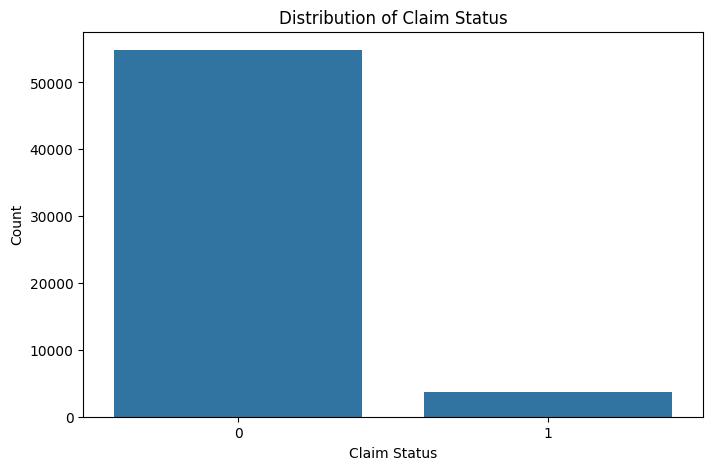

In [22]:
plt.figure(figsize = (8,5))
sns.countplot(x='claim_status',data=data)

plt.title('Distribution of Claim Status')
plt.xlabel('Claim Status')
plt.ylabel('Count')
plt.show()

The distribution of the claim_status shows a significant imbalance between the classes, with much fewer claims (1) compared to no claims (0). This imbalance will be a challenge to address during the model training phase to ensure our model does not become biased toward predicting the majority class.



Next performing analysis of both numerical and categorical features to understand their distributions and relationships with the claim_status. Examining the distributions of some key numerical features such as subscription_length, vehicle_age, and customer_age:

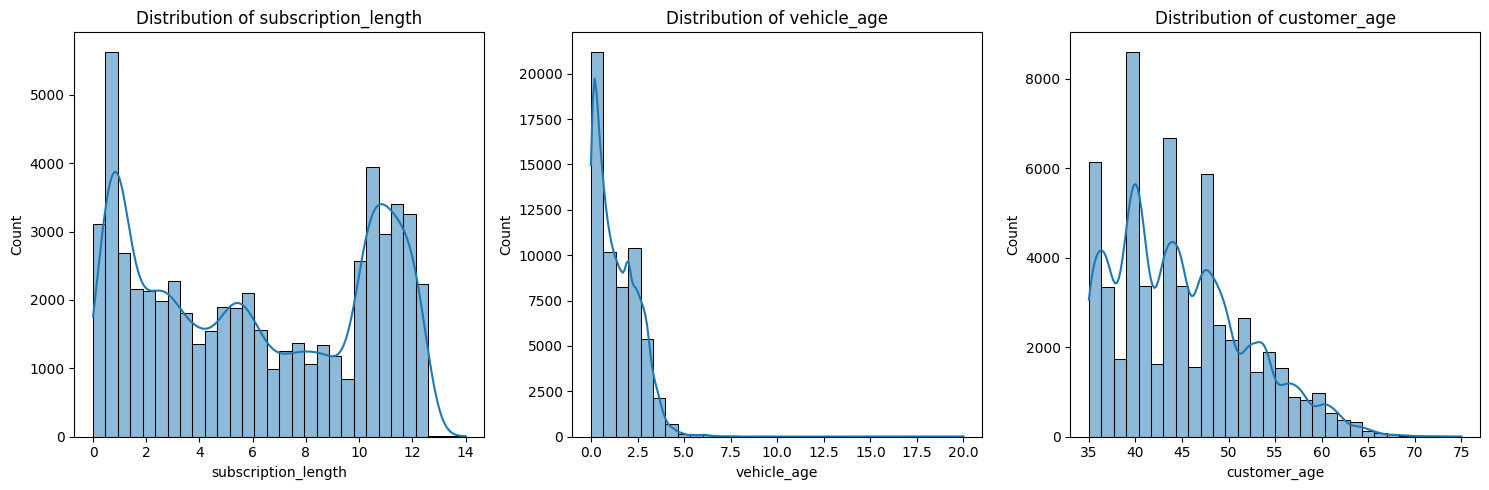

In [23]:
numerical_cols = ['subscription_length','vehicle_age','customer_age']

plt.figure(figsize=(15,5))
for i,column in enumerate(numerical_cols,1):
  plt.subplot(1,3,i)
  sns.histplot(data[column],bins=30,kde=True)
  plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

subscription_length: Most values are clustered around lower numbers, indicating that many policies have shorter subscription lengths.

vehicle_age: This distribution is somewhat uniform but with spikes at specific ages, possibly representing common vehicle age intervals in the dataset.

customer_age: This shows a fairly normal distribution, with the majority of customers falling within a middle-age range.

Next analyzing relevant categorical features to understand their variation and relationship with the claim_status. will focus on features like region_code, segment, and fuel_type:

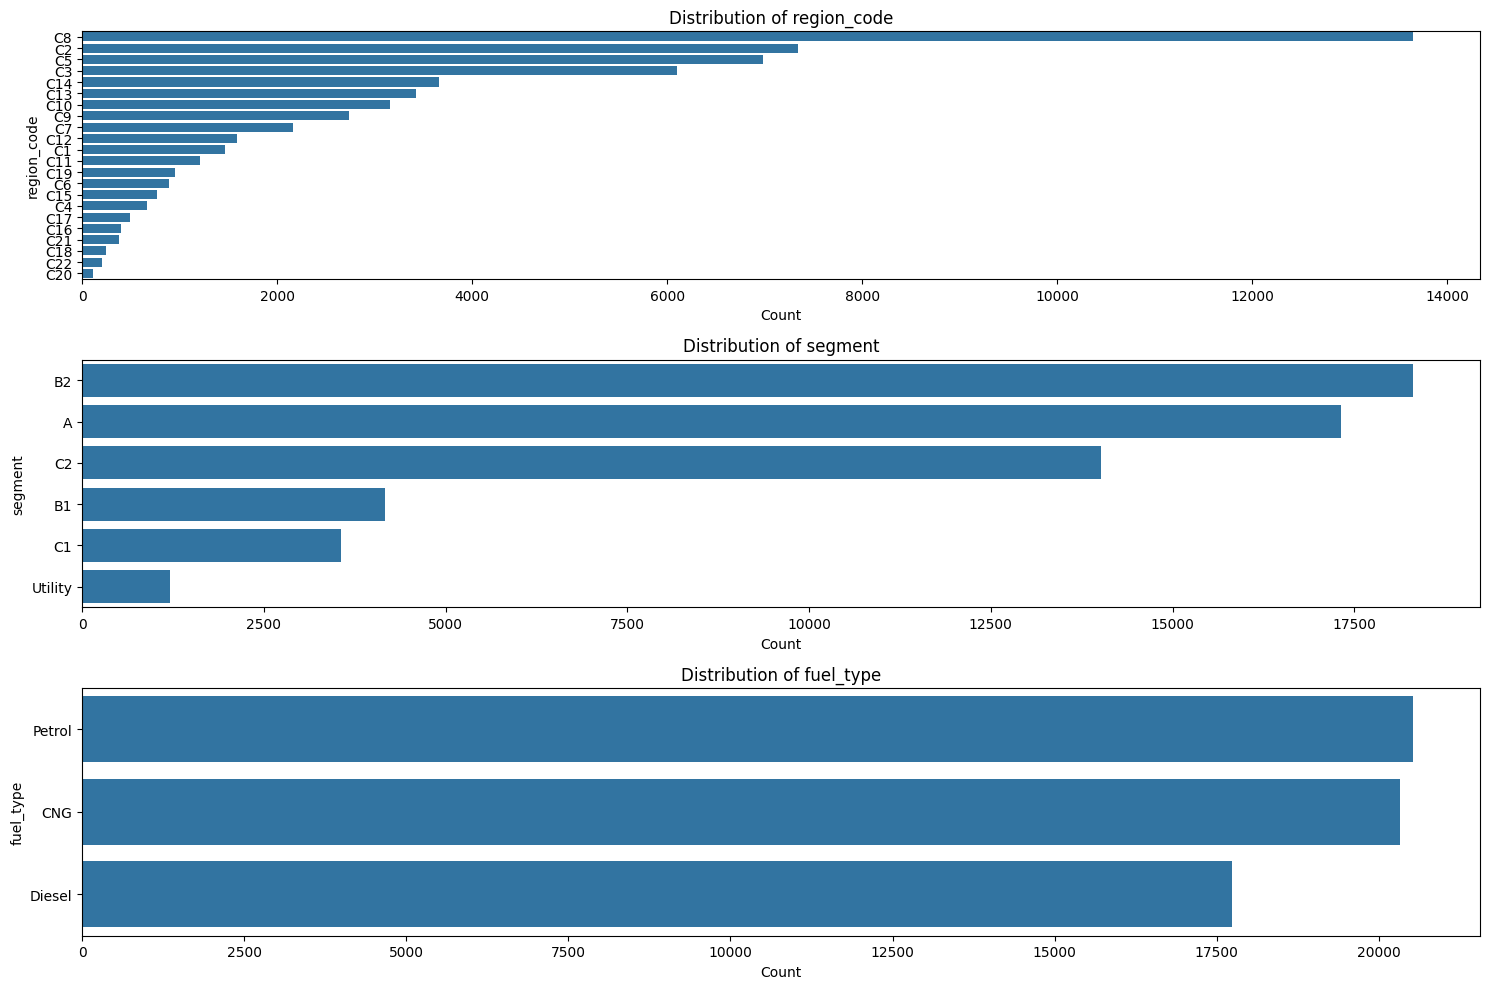

In [24]:
categorical_cols = ['region_code', 'segment', 'fuel_type']

plt.figure(figsize=(15,10))
for i,column in enumerate(categorical_cols,1):
  plt.subplot(3,1,i)
  sns.countplot(y=column,data=data,order = data[column].value_counts().index)
  plt.title(f'Distribution of {column}')
  plt.xlabel('Count')
  plt.ylabel(column)

plt.tight_layout()
plt.show()

For ‘region_code,’ there is a wide variety of codes, each with varying counts, but a few specific codes dominate with much higher counts than others. In the ‘segment’ distribution, there are fewer categories, with the ‘B2’ segment being the most common, followed by ‘A’ and ‘C2,’ and the ‘Utility’ segment being the least common. Lastly, ‘fuel_type’ shows three categories: ‘Petrol’ has the highest count than CNG and Diesel.

# Handling the Class Imbalance using Oversampling

In [25]:
from sklearn.utils import resample

majority = data[data.claim_status == 0]
minority = data[data.claim_status == 1]

#oversample the minority class
minority_oversampled = resample(minority,
                                replace = True,
                                n_samples = len(majority),
                                random_state = 42)
#combine majority class with oversampled minority class
oversampled_data = pd.concat([majority,minority_oversampled])

#check the distribution of undersampled and oversampled datasets
oversampled_distribution = oversampled_data.claim_status.value_counts()

oversampled_distribution

claim_status
0    54844
1    54844
Name: count, dtype: int64

After performing oversampling on the minority class, both classes are balanced with 54,844 entries each

Now checking the balanced data in visual form

Text(0.5, 1.0, 'Segment Distribution')

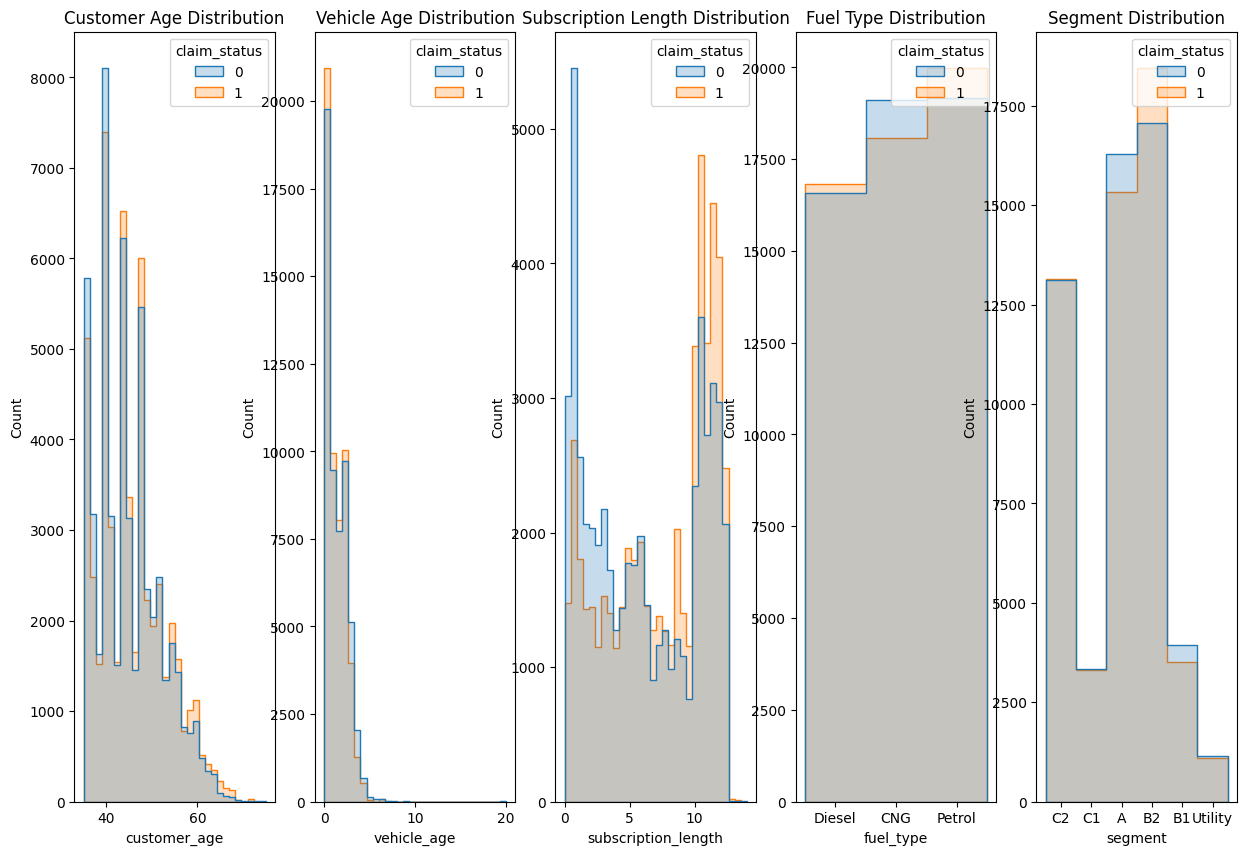

In [26]:
plt.figure(figsize=(15,10))

plt.subplot(1,5,1)
sns.histplot(data=oversampled_data, x='customer_age', hue='claim_status', element='step',bins=30)
plt.title('Customer Age Distribution')


plt.subplot(1,5,2)
sns.histplot(data=oversampled_data, x='vehicle_age', hue='claim_status', element='step',bins=30)
plt.title('Vehicle Age Distribution')


plt.subplot(1,5,3)
sns.histplot(data=oversampled_data, x='subscription_length', hue='claim_status', element='step',bins=30)
plt.title('Subscription Length Distribution')


plt.subplot(1,5,4)
sns.histplot(data=oversampled_data, x='fuel_type', hue='claim_status', element='step',bins=30)
plt.title('Fuel Type Distribution')


plt.subplot(1,5,5)
sns.histplot(data=oversampled_data, x='segment', hue='claim_status', element='step',bins=30)
plt.title('Segment Distribution')


# Feature Selection

Identify the most important variables for predicting insurance frequency claims. It involves analyzing both categorical and numerical features to determine their impact on the target variable. Will use feature importance techniques suitable for both types of variables and the categorical variable are being encoded to numerical using Label Encoder - Label encoding assigns a unique integer to each category in the column.

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
encoded_data = data.apply(lambda col: le.fit_transform(col) if col.dtype == 'object' else col)

X = encoded_data.drop('claim_status', axis=1)
Y = encoded_data['claim_status']

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X,Y)

feature_importance = rf_model.feature_importances_

#creating a datframe for visualization of feature importance
features_df = pd.DataFrame({'Feature' : X.columns, 'Importance':feature_importance})
features_df = features_df.sort_values(by='Importance',ascending=False)

print(features_df.head(10))

                Feature  Importance
0             policy_id    0.321072
1   subscription_length    0.248309
3          customer_age    0.176639
2           vehicle_age    0.135190
5        region_density    0.053838
4           region_code    0.052649
7                 model    0.000957
24               length    0.000846
26         gross_weight    0.000834
11          engine_type    0.000791


These variables appear to have the most influence on the likelihood of an insurance claim being made. However, it’s notable that policy_id has a very high importance, which might not be intuitively relevant for prediction. So, it is required to make sure to drop the policy_id column while model training.

In [28]:
oversampled_data = oversampled_data.drop('policy_id', axis=1)


#Model Training

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier

X_oversampled = oversampled_data.drop('claim_status', axis=1)
y_oversampled = oversampled_data['claim_status']

X_oversampled_encoded = X_oversampled.apply(lambda col: LabelEncoder().fit_transform(col) if col.dtype == 'object' else col)

X_train, X_test, y_train, y_test = train_test_split(
    X_oversampled_encoded, y_oversampled, test_size=0.3, random_state=42)


rf_model_oversampled = RandomForestClassifier(random_state=42)
rf_model_oversampled.fit(X_train, y_train)

# predictions
y_pred = rf_model_oversampled.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     16574
           1       0.96      1.00      0.98     16333

    accuracy                           0.98     32907
   macro avg       0.98      0.98      0.98     32907
weighted avg       0.98      0.98      0.98     32907



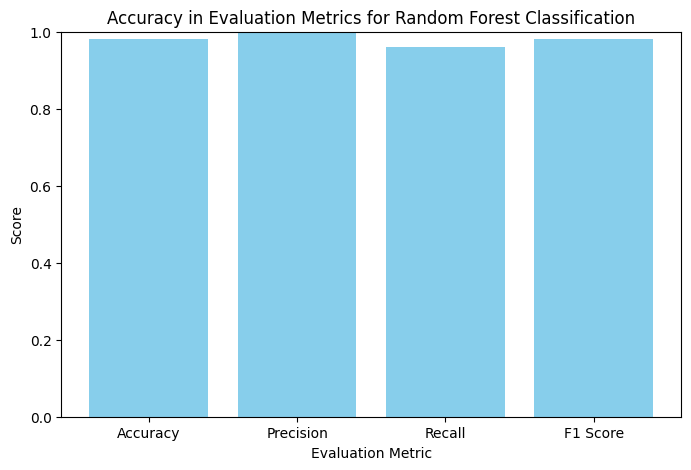

In [30]:
accuracy_scores = {
    'Accuracy': 0.98,
    'Precision': 1.00,
    'Recall': 0.96,
    'F1 Score': 0.98
}

metric_names = list(accuracy_scores.keys())
scores = list(accuracy_scores.values())

plt.figure(figsize=(8, 5))
plt.bar(metric_names, scores, color='skyblue')
plt.xlabel('Evaluation Metric')
plt.ylabel('Score')
plt.title('Accuracy in Evaluation Metrics for Random Forest Classification')
plt.ylim(0, 1)
plt.show()


#Observations from the above Evaluation metrics table

The classification report above provides various metrics to evaluate the performance of the predictive model on the test data.

For class 0 (no claim), precision is 1.00, meaning that when the model predicts no claim, it is correct 100% of the time. For class 1 (claim), precision is 0.96, indicating that when the model predicts a claim, it is correct 96% of the time.

For class 0, recall is 0.96, signifying that the model correctly identifies 96% of all actual no-claim instances. For class 1, recall is 1.00, showing that the model correctly identifies 100% of all actual claim instances.

The F1-score for both classes is 0.98, indicating a high balance between precision and recall. It means the model is both accurate and reliable in its predictions across both classes.

The overall accuracy of the model is 98%, which means that it correctly predicts the claim status for 98% of the cases in the test dataset.

The macro average for precision, recall and F1-score is 0.98, reflecting the average performance of the model across both classes without considering the imbalance in class distribution. This high value suggests that the model performs well across both classes. The weighted average for precision, recall, and F1-score is also 0.98, taking into account the imbalance in class distribution. It indicates that, on average, the model performs consistently well across the different classes when considering their distribution in the dataset.

These results indicate a highly effective model for predicting insurance claims, with strong performance metrics across both classes of outcomes. The high recall for claims (class 1) is particularly notable as it implies that the model is very effective at identifying the instances where claims occur, which is often the primary concern in imbalanced datasets.

# Summary -

Imbalanced data refers to a situation in classification problems where the number of observations in each class significantly differs. In such datasets, one class (the majority class) vastly outnumbers the other class (the minority class). This imbalance can lead to biased models that favour the majority class, resulting in poor predictive performance on the minority class, which is often the class of greater interest.

So in this way the imbalanced datsets are handled and finally loaded into the model for prediction or classification purposes